# AIRLINE CUSTOMER SEGMENTATION

### INTRODUCTION 

**Introduction :**<br>
Suatu maskapai perusahaan ingin mengetahui bagaimana karakteristik umum dari customernya dengan cara membuat suatu customer segmentation. Segmentasi customer ini kemudian akan digunakan sebagai acuan dalam memutuskan keputusan bisnis selanjutnya, contohnya untuk menentukan promo yang sesuai dengan masing-masing segmentasi customer, atau campaign lain. 

Tentu jika digunakan dengan baik, segmentasi pelanggan ini dapat memberikan banyak keuntungan. Contohnya perusahaan dapat menekan marketing atau campaign cost karena dapat langsung memberikan treatment yang sesuai kepada tiap segmen customer, dan dengan treatment yang sesuai pasti campaign tersebut akan lebih mudah diterima oleh customer dan mendatangkan lebih banyak profit.

### LIBRARY AND DATA IMPORT

In [132]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


In [133]:
# Import dataset
df = pd.read_csv('flight.csv')

### DATA CLEANSING AND ANALYSIS

In [134]:
# Data sample
df.head(10)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39
5,56972,2/10/2008,9/29/2009,Male,6,guangzhou,guangdong,CN,64.0,3/31/2014,...,76946.0,294585,1/13/2014,79,7.043956,52,10,0.967692,343121,15
6,44924,3/22/2006,3/29/2006,Male,6,wulumuqishi,xinjiang,CN,46.0,3/31/2014,...,114469.0,287042,3/31/2014,1,7.190000,28,20,0.965347,298873,29
7,22631,4/9/2010,4/9/2010,Female,6,wenzhoushi,zhejiang,CN,50.0,3/31/2014,...,114971.0,287230,3/29/2014,3,10.111111,45,7,0.962070,351198,14
8,32197,6/7/2011,7/1/2011,Male,5,DRANCY,NaN,FR,50.0,3/31/2014,...,87401.0,321489,3/26/2014,6,13.054545,94,5,0.828478,295158,7
9,31645,7/5/2010,7/5/2010,Female,6,wenzhou,zhejiang,CN,43.0,3/31/2014,...,60267.0,375074,3/17/2014,15,11.333333,73,13,0.708010,251907,16


Satu record data merepresentasikan data tiap customer

In [135]:
# Data overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

Dataset terdiri atas 62988 record data, dan 23 feature.<br>
Berikut merupakan deskripsi dari masing-masing feature:
Code Description<br>
* MEMBER_NO-b         : ID Member<br>
* FFP_DATE            : Frequent Flyer Program Join Date<br>
* FIRST_FLIGHT_DATE   : Tanggal Penerbangan pertama<br>
* GENDER              : Jenis Kelamin<br>
* FFP_TIER            : Tier dari Frequent Flyer Program<br>
* WORK_CITY           : Kota Asal<br>
* WORK_PROVINCE       : Provinsi Asal<br>
* WORK_COUNTRY        : Negara Asal<br>
* AGE                 : Umur Customer<br>
* LOAD_TIME           : Tanggal data diambil <br>
* FLIGHT_COUNT        : Jumlah penerbangan Customer<br>
* BP_SUM              : Rencana Perjalanan<br>
* SUM_YR_1            : Fare Revenue<br>
* SUM_YR_2            : Votes Prices<br>
* SEG_KM_SUM          : Total jarak(km) penerbangan yg sudah dilakukan<br>
* LAST_FLIGHT_DATE    : Tanggal penerbangan terakhir<br>
* LAST_TO_END         : Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir<br>
* AVG_INTERVAL        : Rata-rata jarak waktu<br>
* MAX_INTERVAL        : Maksimal jarak waktu<br>
* EXCHANGE_COUNT      : Jumlah penukaran<br>
* avg_discount        : Rata rata discount yang didapat customer<br>
* Points_Sum          : Jumlah poin yang didapat customer<br>
* Point_NotFlight     : point yang tidak digunakan oleh members<br>

Terdapat beberapa feature dengan data type yang tidak sesuai, yaitu 'MEMBER_NO' yang harusnya bertipe object, FFP_DATE, FIRST_FLIGHT_DATE, dan LAST_FLIGHT_DATE harusnya bertipe datetime. Selanjutnya akan diganti tipe data pda feature tersebut.

In [136]:
# Changing MEMBER_NO data type
df['MEMBER_NO'] = df['MEMBER_NO'].astype('object')

In [137]:
# for i in ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']:
#     df[i] = pd.to_datetime(df[i])
# df['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE'].info()

Terdapat kesalahan input data pada kolom LAST_FLIGHT_DATE, dimana tersapat input tanggal 29-2-2014 yang mana tanggal tersebut tidak ada atau melebihi tanggal di bulan 2/2014.

In [138]:
df[(df['FFP_DATE'] == '2014/2/29  0:00:00') | (df['FIRST_FLIGHT_DATE'] == '2014/2/29  0:00:00') | (df['LOAD_TIME'] == '2014/2/29  0:00:00') | (df['LAST_FLIGHT_DATE'] == '2014/2/29  0:00:00')]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
248,56497,6/17/2007,6/17/2007,Female,6,guangzhou,guangdong,CN,46.0,3/31/2014,...,70845.0,85000,2014/2/29 0:00:00,32,13.250000,57,0,1.373478,132653,4
447,17306,8/26/2009,4/29/2010,Male,5,haerbin,heilongjiang,CN,70.0,3/31/2014,...,46323.0,69453,2014/2/29 0:00:00,32,22.766667,75,6,1.375395,101413,7
473,915,11/10/2006,1/26/2007,Male,5,.,beijing,CN,39.0,3/31/2014,...,30580.0,65717,2014/2/29 0:00:00,32,14.250000,65,1,1.425974,93153,8
832,20336,7/13/2005,8/6/2005,Male,5,guangzhou,guangdong,CN,40.0,3/31/2014,...,36417.0,114222,2014/2/29 0:00:00,32,8.696203,34,2,0.664970,91476,15
1051,62884,5/24/2006,4/21/2007,Male,5,wuhan,hubei,CN,50.0,3/31/2014,...,35680.0,49859,2014/2/29 0:00:00,32,19.115385,72,4,1.388584,69047,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61539,55995,1/11/2013,7/10/2013,Male,4,dalianshi,liaoning,CN,23.0,3/31/2014,...,955.0,3513,2014/2/29 0:00:00,32,117.000000,211,0,0.276667,0,0
61871,48742,7/26/2009,7/26/2009,Male,4,tianjin,tianjin,CN,37.0,3/31/2014,...,966.0,1298,2014/2/29 0:00:00,32,135.000000,135,0,0.690000,1094,1
61909,9190,4/11/2011,4/20/2011,Male,4,guangzhou,guangdong,CN,34.0,3/31/2014,...,853.0,2595,2014/2/29 0:00:00,32,1.000000,1,0,0.340000,3356,19
62721,38776,10/31/2007,3/13/2008,Male,4,foshan,guangdong,CN,42.0,3/31/2014,...,688.0,1199,2014/2/29 0:00:00,32,78.000000,78,0,0.489525,276,0


Terdapat 421 kolom yang salah input tanggal pada kolom LAST_FLIGHT_DATE. Kemudian akan diganti menjadi tanggal 1 Maret 2014.

In [139]:
df['LAST_FLIGHT_DATE'] = df['LAST_FLIGHT_DATE'].replace('2014/2/29  0:00:00','2014/3/01  0:00:00')

Akan dilanjutkan pergantian data type

In [140]:
for i in ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']:
    df[i] = pd.to_datetime(df[i])
df[['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           62988 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  62988 non-null  datetime64[ns]
 2   LOAD_TIME          62988 non-null  datetime64[ns]
 3   LAST_FLIGHT_DATE   62988 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.9 MB


**Kapan data diambil?**

In [141]:
df['LOAD_TIME'].unique()

array(['2014-03-31T00:00:00.000000000'], dtype='datetime64[ns]')

Data hanya diambil satu kalo pada tanggal 31 Maret 2014.

**Bagaimana distribusi penerbangan pertama dan terakhir dari customer?**

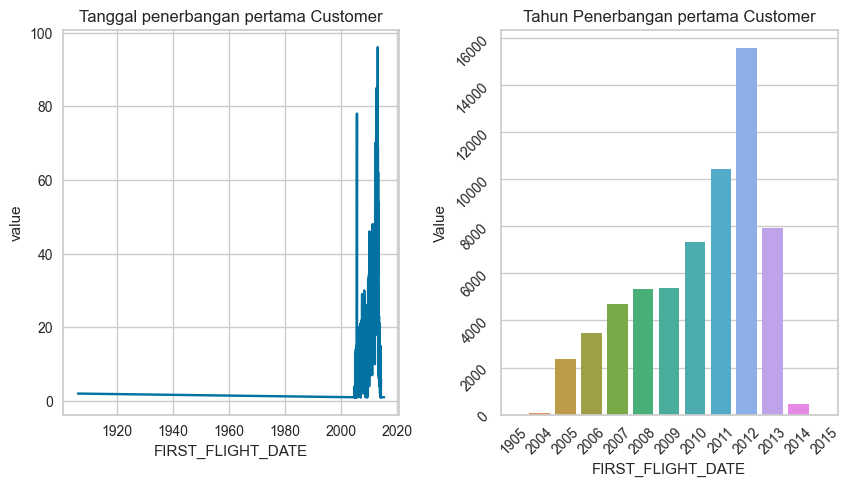

In [142]:
date_plot1, axs = plt.subplots(ncols=2, figsize=(10, 5))

sns.lineplot(df.groupby('FIRST_FLIGHT_DATE').agg(value = ('MEMBER_NO', 'nunique')).reset_index(), x = 'FIRST_FLIGHT_DATE', y = 'value', ax = axs[0])
axs[0].set_title('Tanggal penerbangan pertama Customer')

sns.barplot(df.groupby(df['FIRST_FLIGHT_DATE'].dt.year).agg(Value = ('MEMBER_NO', 'nunique')).reset_index(),  y = 'Value', x = 'FIRST_FLIGHT_DATE', ax = axs[1])
axs[1].set_title('Tahun Penerbangan pertama Customer')
axs[1].tick_params(labelrotation=45)

date_plot1.subplots_adjust(wspace=0.3, hspace = 0.4)

* Terlihat terdapat customer yang melakukan penerbangan pertama pada tahun 1905, data ini perlu dicheck kembali apakah benar atau ada kesalahan input.
* Terdapat customer dengan penerbangan pertama pada tahun 2015, padahal data ini diambil pada tahun 2014. Harus dicek apakah memang penerbangan tersebut merupakan penerbangan yang akan dilakukan atau terjadi kesalahan input

In [143]:
# Chech customer dengan penerbangan pada tahun 1905
df[df['FIRST_FLIGHT_DATE'].dt.year == 1905][['MEMBER_NO', 'FIRST_FLIGHT_DATE', 'LAST_FLIGHT_DATE', 'AGE']]

,MEMBER_NO,FIRST_FLIGHT_DATE,LAST_FLIGHT_DATE,AGE
4455,41193,1905-12-31,2014-03-14,35.0
30099,1999,1905-12-31,2013-11-19,37.0


Terdapat data customer dengan penerbangan pertama pada tahun 1905, dan penerbangan terakhir pada tahun padahal usianya baru 30-an tahun. Tentu hal ini merupakan kesalahan input data,sehingga data ini akan dihapus

In [144]:
#  Hapus customer dengan penerbangan pertama pada tahun 1905
df = df[df['FIRST_FLIGHT_DATE'].dt.year != 1905]

In [145]:
# Check customer dengan penerbangan pertama setelah data diambil
df[df['FIRST_FLIGHT_DATE'] > df['LOAD_TIME']][['MEMBER_NO','FFP_DATE','FIRST_FLIGHT_DATE', 'LAST_FLIGHT_DATE', 'AGE']]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,LAST_FLIGHT_DATE,AGE
3293,12746,2008-09-24,2015-03-09,2014-01-08,47.0
3733,17746,2007-06-04,2015-02-15,2014-03-27,41.0
16393,56588,2007-04-01,2015-05-30,2014-02-17,43.0
25240,62783,2006-03-08,2014-07-14,2013-09-15,38.0
28231,45225,2011-01-15,2015-04-03,2014-03-24,48.0
33198,9889,2006-11-10,2014-09-11,2014-02-09,48.0


Customer dengan tanggal penerbangan pertama lebih dari tanggal data diambil memiliki kesalahan input data, karena terlihat penerbangan pertama setelah tanggal penerbangan terakhir, jadi dipastikan terdapat kesalahan input data.

Akan dillihat kembali apakah ada customer lain dengan masalah seperti ini.

In [146]:
# Check customer dengan penerbangan pertama setelah data diambil
df[df['FIRST_FLIGHT_DATE'] > df['LAST_FLIGHT_DATE']][['MEMBER_NO','FFP_DATE','FIRST_FLIGHT_DATE', 'LAST_FLIGHT_DATE', 'AGE']]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,LAST_FLIGHT_DATE,AGE
3293,12746,2008-09-24,2015-03-09,2014-01-08,47.0
3733,17746,2007-06-04,2015-02-15,2014-03-27,41.0
16393,56588,2007-04-01,2015-05-30,2014-02-17,43.0
25240,62783,2006-03-08,2014-07-14,2013-09-15,38.0
28231,45225,2011-01-15,2015-04-03,2014-03-24,48.0
33198,9889,2006-11-10,2014-09-11,2014-02-09,48.0


Tidak ada customer lain yang memiliki masalah sama.

Akan dihapus customer dengan penerbangan pertama setelah tanggal penerbangan terakhir.

In [147]:
# Check customer dengan penerbangan pertama setelah data diambil
df = df[df['FIRST_FLIGHT_DATE'] < df['LAST_FLIGHT_DATE']]

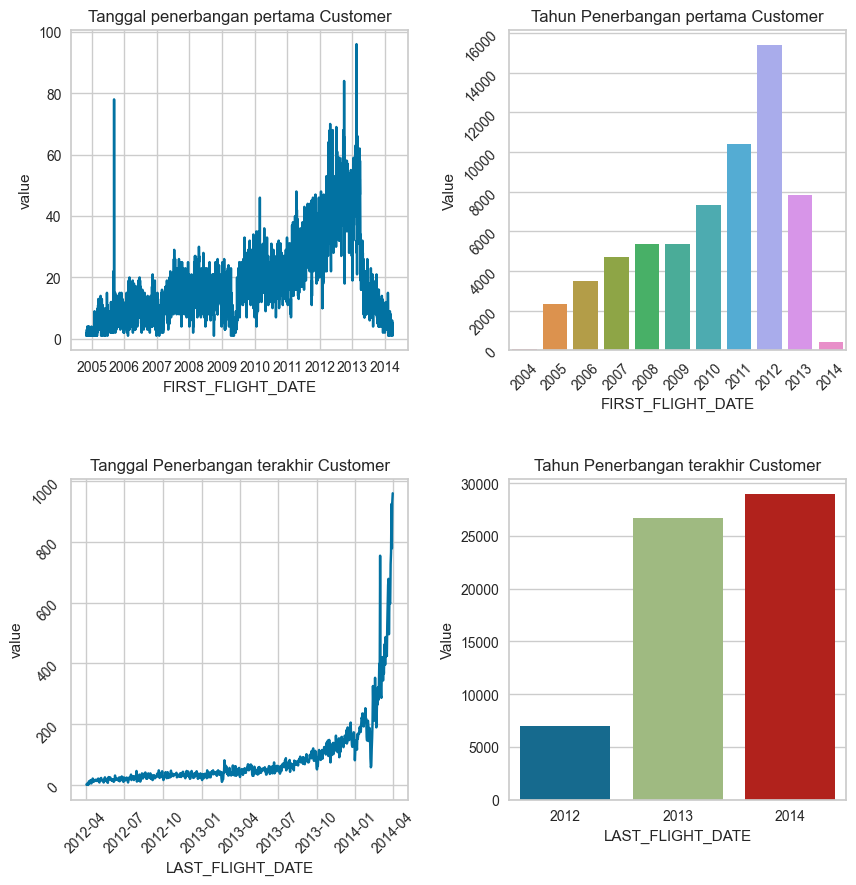

In [148]:
date_plot2, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

sns.lineplot(df.groupby('FIRST_FLIGHT_DATE').agg(value = ('MEMBER_NO', 'nunique')).reset_index(), x = 'FIRST_FLIGHT_DATE', y = 'value', ax = axs[0][0])
axs[0][0].set_title('Tanggal penerbangan pertama Customer')

sns.barplot(df.groupby(df['FIRST_FLIGHT_DATE'].dt.year).agg(Value = ('MEMBER_NO', 'nunique')).reset_index(),  y = 'Value', x = 'FIRST_FLIGHT_DATE', ax = axs[0][1])
axs[0][1].set_title('Tahun Penerbangan pertama Customer')
axs[0][1].tick_params(labelrotation=45)

sns.lineplot(df.groupby('LAST_FLIGHT_DATE').agg(value = ('MEMBER_NO', 'nunique')).reset_index(), x = 'LAST_FLIGHT_DATE', y = 'value', ax = axs[1][0])
axs[1][0].set_title('Tanggal Penerbangan terakhir Customer')
axs[1][0].tick_params(labelrotation=45)

sns.barplot(df.groupby(df['LAST_FLIGHT_DATE'].dt.year).agg(Value = ('MEMBER_NO', 'nunique')).reset_index(),  y = 'Value', x = 'LAST_FLIGHT_DATE', ax = axs[1][1])
axs[1][1].set_title('Tahun Penerbangan terakhir Customer')

date_plot2.subplots_adjust(wspace=0.3, hspace = 0.4)

* Banyak customer baru yang melakukan penerbangan pertama terus naik dari tahun 2004 sampai 2012, kemudian turun drastis pada tahun 2013 dan semakin turun hingga tahun 2014. Perlu dianalisis apa penyebab turunnya customer ini dan dicari solusi untuk meminimalisir masalah karena jika tidak segera ditangani maka akan menyebabkan revenue perusahaan yang terus turun dan terancam bangkrut karena penurunan customer yang drastis ini.
* Sejalan dengan customer baru yang terus turun pada tahun 2013, customer yang melakukan penerbangan terakhir atau stop menggunakan layanan maskapai ini terus meningkat dari tahun 2012 hingga 2014.

Kita akan melihat bagaimana trend maskapai dari banyaknya customer baru yang mendaftar FFP program.

In [149]:
# Mencari rata-rata banyak customer yang join FFP program tiap bulan pertahunnya
df_copy = df.copy()
df_copy['Month_FFP'] = df_copy['FFP_DATE'].dt.month
df_copy['Year_FFP'] = df_copy['FFP_DATE'].dt.year
month_ffp = df_copy.groupby(['Month_FFP', 'Year_FFP']).agg(count = ('MEMBER_NO', 'nunique')).reset_index()
month_ffp = month_ffp.groupby('Month_FFP').agg(mean = ('count', 'mean')).reset_index()

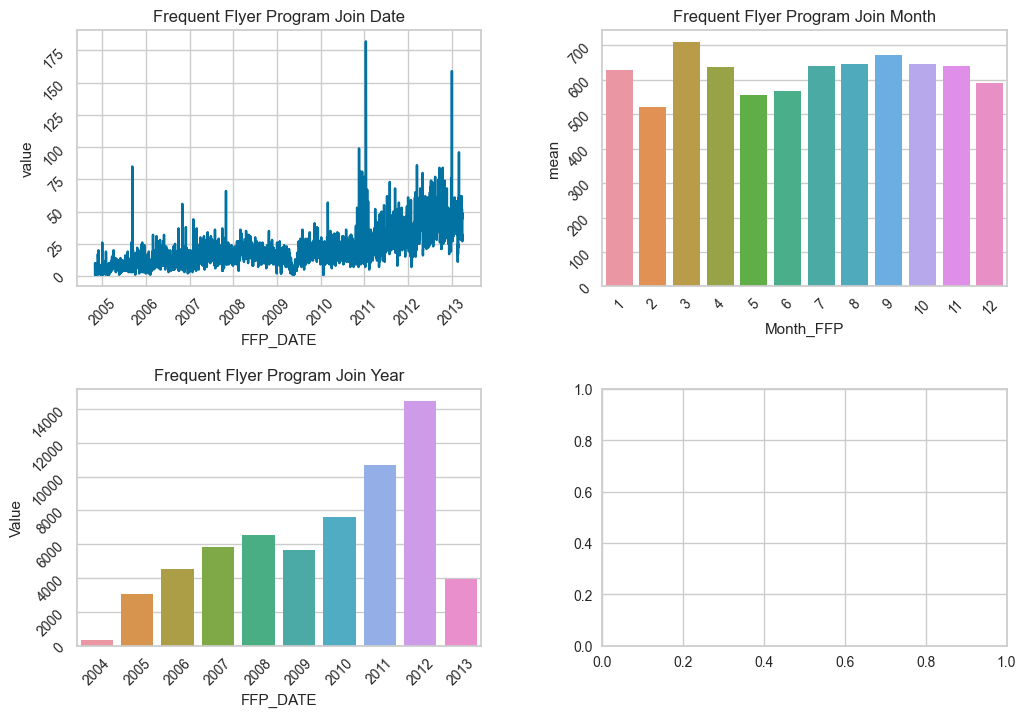

In [150]:
date_plot3, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

sns.lineplot(df.groupby('FFP_DATE').agg(value = ('MEMBER_NO', 'nunique')).reset_index(), x = 'FFP_DATE', y = 'value', ax = axs[0][0])
axs[0][0].set_title('Frequent Flyer Program Join Date')
axs[0][0].tick_params(labelrotation=45)

sns.barplot(month_ffp,  y = 'mean', x = 'Month_FFP', ax = axs[0][1])
axs[0][1].set_title('Frequent Flyer Program Join Month')
axs[0][1].tick_params(labelrotation=45)

sns.barplot(df.groupby(df['FFP_DATE'].dt.year).agg(Value = ('MEMBER_NO', 'nunique')).reset_index(),  y = 'Value', x = 'FFP_DATE', ax = axs[1][0])
axs[1][0].set_title('Frequent Flyer Program Join Year')
axs[1][0].tick_params(labelrotation=45)

date_plot3.subplots_adjust(wspace=0.3, hspace = 0.4)

* Banyak Customer yang mendaftar FFP program terus naik dari 1004 hingga 2008, kemudian mengalami penurunan pada 2008 dan kembali naik hingga 2012
* Sama seperti tren penerbangan pertama dan terakhir customer, terjadi penurunan drastis customer yang mendaptar FFP Program pada 2013
* Terindikasi terdapat hal atau kejadian penting yang terjadi pada 2013 yang menyebabkan penurunan drastis customer, yang perlu diteliti lebih lanjut
* Rata-rata banyak customer yang mendaptar FFP program tiap tahunnya banyak di bulan Maret, dan sekitaran Agustus September Oktober

**Bagaimana frekuensi dari tiap kategori pada feature bertipe kategorikal?**

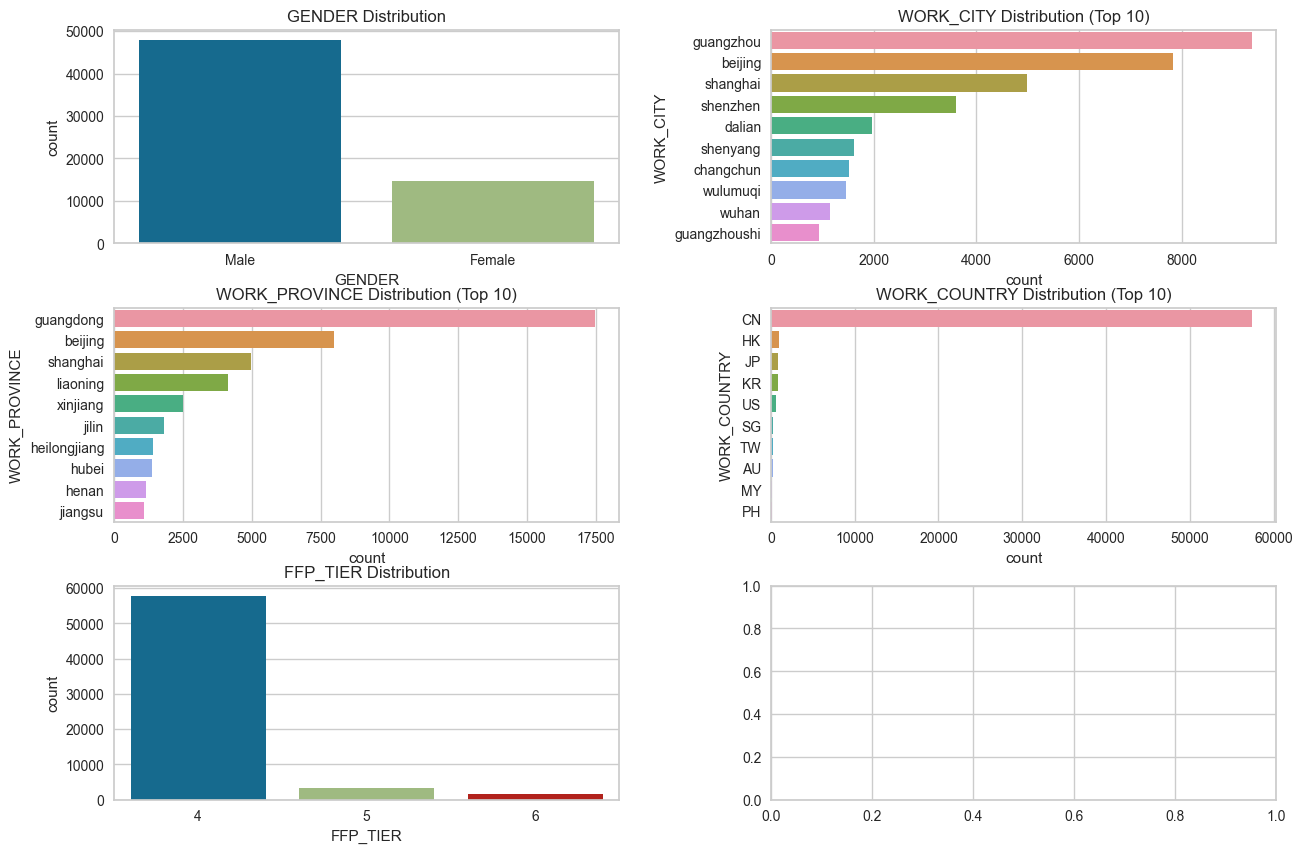

In [151]:
cats_plot, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

sns.countplot(df, x = 'GENDER', ax = axs[0][0])
axs[0][0].set_title('GENDER Distribution')

sns.barplot(df.groupby('WORK_CITY').agg(count = ('MEMBER_NO', 'nunique')).reset_index().sort_values('count', ascending = False).head(10), y = 'WORK_CITY', x = 'count', ax = axs[0][1])
axs[0][1].set_title('WORK_CITY Distribution (Top 10)')

sns.barplot(df.groupby('WORK_PROVINCE').agg(count = ('MEMBER_NO', 'nunique')).reset_index().sort_values('count', ascending = False).head(10), y = 'WORK_PROVINCE', x = 'count', ax = axs[1][0])
axs[1][0].set_title('WORK_PROVINCE Distribution (Top 10)')

sns.barplot(df.groupby('WORK_COUNTRY').agg(count = ('MEMBER_NO', 'nunique')).reset_index().sort_values('count', ascending = False).head(10), y = 'WORK_COUNTRY', x = 'count', ax = axs[1][1])
axs[1][1].set_title('WORK_COUNTRY Distribution (Top 10)')

sns.countplot(df, x = 'FFP_TIER', ax = axs[2][0])
axs[2][0].set_title('FFP_TIER Distribution')

cats_plot.subplots_adjust(wspace=0.3, hspace = 0.3)

**Distribusi usia Customer**

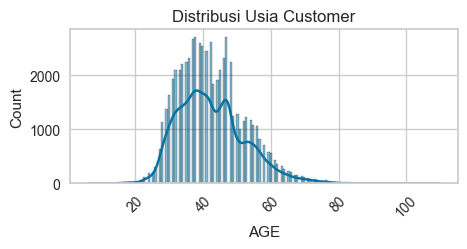

In [152]:
# create plot
plt.figure(figsize=(5,2))
sns.histplot(df['AGE'], kde = True)
plt.title("Distribusi Usia Customer")
plt.xticks(rotation=45)

# show plot
plt.show()

Mayoritas customer berada pada usia sekitar 20-60 tahun

**Distribusi banyak penerbangan customer**

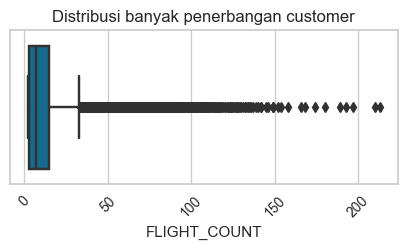

In [153]:
# create plot
plt.figure(figsize=(5,2))
sns.boxplot(x = df['FLIGHT_COUNT'])
plt.title("Distribusi banyak penerbangan customer")
plt.xticks(rotation=45)

# show plot
plt.show()

Mayoritas customer melakukan perjalanan kurang dari 50 kali.

**Distribusi total jarak yang telah ditempuh customer dan rencana perjalanannya**

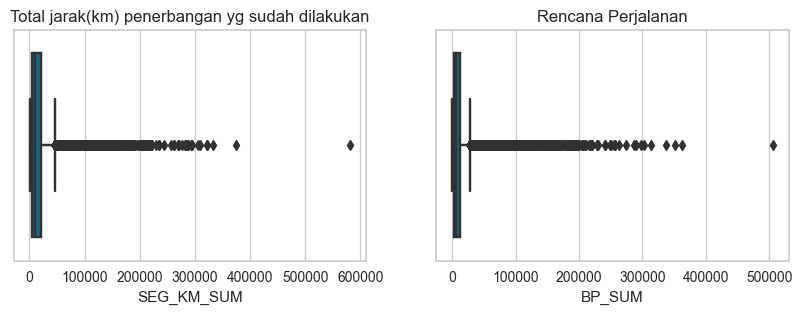

In [154]:
nums_boxplot1, axs = plt.subplots(ncols=2, figsize=(10, 3))

sns.boxplot(df, x='SEG_KM_SUM', ax = axs[0])
axs[0].set_title('Total jarak(km) penerbangan yg sudah dilakukan')

sns.boxplot(df, x='BP_SUM', ax = axs[1])
axs[1].set_title('Rencana Perjalanan')

nums_boxplot1.subplots_adjust(wspace=0.2, hspace = 0.5)

Mayoritas customer memiliki total penerbangan dan rencana perjalanan yang pendek.

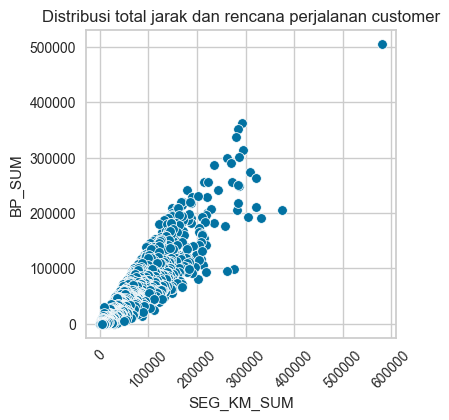

In [155]:
# create plot
plt.figure(figsize=(4,4))
sns.scatterplot(df, x = 'SEG_KM_SUM', y = 'BP_SUM')
plt.title("Distribusi total jarak dan rencana perjalanan customer")
plt.xticks(rotation=45)

# show plot
plt.show()

Total perjalanan dan rencana perjalanan customer cenderung sama, atau berkorelasi positif.

**Distribusi Jarak waktu penerbangan terakhir customer dengan saat data diambil (Flight Recency)?**

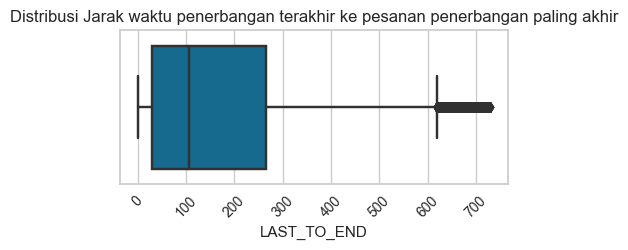

In [156]:
# create plot
plt.figure(figsize=(5,2))
sns.boxplot(x = df['LAST_TO_END'])
plt.title("Distribusi Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir")
plt.xticks(rotation=45)

# show plot
plt.show()

Mayoritas jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir kurang dari 600 hari.

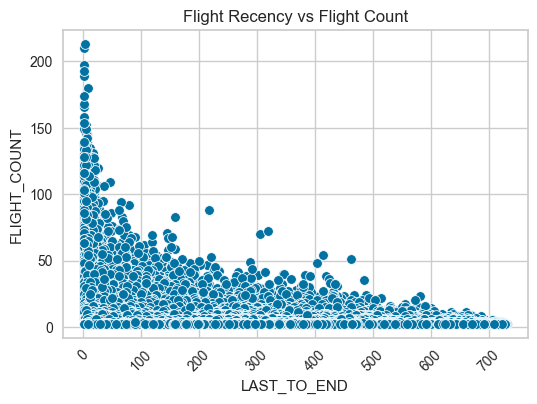

In [157]:
# create plot
plt.figure(figsize=(6,4))
sns.scatterplot(df, x = 'LAST_TO_END', y = 'FLIGHT_COUNT')
plt.title("Flight Recency vs Flight Count")
plt.xticks(rotation=45)

# show plot
plt.show()

Dari scatterplot antara jumlah penerbangan dan durasi flight recency customer, dapat diketahui bahwa hanya sedikit customer yang melakukan banyak penerbangan dan masih menggunakan maskapai hingga waktu yang dekat dengan saat data diambil. Mayoritas customer berada pada sedikit penerbangan yang telah dilakukan dan dilakukan pada waktu yang relatif baru (kurang dari 100).

**Distribusi fare revenue dan votes price**

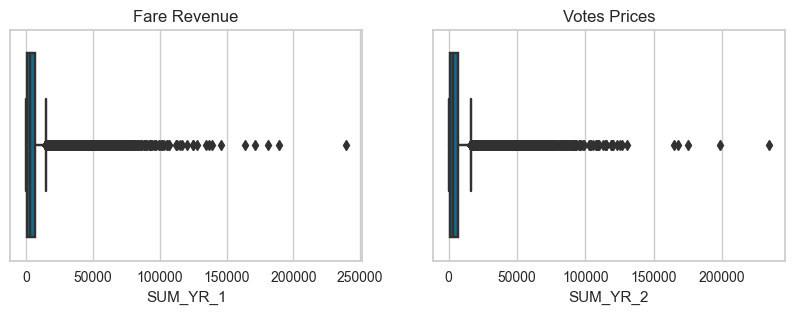

In [158]:
box_nums_plot2, axs = plt.subplots(ncols=2, figsize=(10,3))

sns.boxplot(df, x='SUM_YR_1', ax = axs[0])
axs[0].set_title('Fare Revenue')

sns.boxplot(df, x='SUM_YR_2', ax = axs[1])
axs[1].set_title('Votes Prices')

box_nums_plot2.subplots_adjust(wspace=0.2, hspace = 0.5)

Fare Revenue dan Votes Price customer mayoritas berada di bawah 100000

**Distribusi Rata-rata dan maksimal jarak waktu**

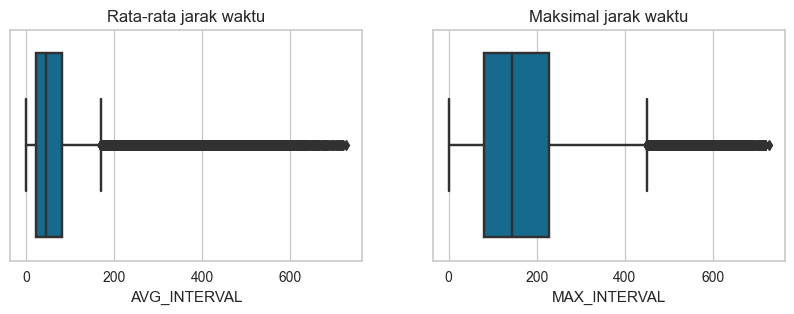

In [159]:
box_nums_plot3, axs = plt.subplots(ncols=2, figsize=(10, 3))

sns.boxplot(df, x='AVG_INTERVAL', ax = axs[0])
axs[0].set_title('Rata-rata jarak waktu')

sns.boxplot(df, x='MAX_INTERVAL', ax = axs[1])
axs[1].set_title('Maksimal jarak waktu')

box_nums_plot3.subplots_adjust(wspace=0.2, hspace = 0.5)

Rata-rata dan maksimal jarak waktu customer masih ada yang bernilai 0. Hal tersebut tentu tidak mungkin karena dapat diartikan customer tidak pernah melakukan perjalanan. Akan dicek terlebih dahulu kolom dengan data seperti itu.
Tetapi mengesampingkan hal tersebut, mayoritas customer memiliki rata-rata jarak waktu kurang dari 200, dan maksimal jarak di bawah sekitar 420.

In [160]:
df[(df['MAX_INTERVAL'] == 0) | (df['AVG_INTERVAL'] == 0)][['MEMBER_NO', 'MAX_INTERVAL', 'AVG_INTERVAL', 'FLIGHT_COUNT']].sort_values('FLIGHT_COUNT', ascending = False)

,MEMBER_NO,MAX_INTERVAL,AVG_INTERVAL,FLIGHT_COUNT
42607,33058,0,0.0,3
18544,5287,0,0.0,2
60390,2566,0,0.0,2
60427,54271,0,0.0,2
60449,10161,0,0.0,2
...,...,...,...,...
55246,47324,0,0.0,2
55190,2545,0,0.0,2
54772,25966,0,0.0,2
54633,14456,0,0.0,2


Diindikasikan terdapat kesalahan input data, karena semua customer dengan rata-rata dan maksimal jarak waktu customer bernilai 0 telah melakukan setidaknya 2 kali penerbangan. Data tersebut akan dihapus dari dataset.

In [161]:
# Menghapus data salah
df = df[(df['MAX_INTERVAL'] > 0) | (df['AVG_INTERVAL'] > 0)]

**Distribusi total penukaran, rata-rata diskon dan poin yang diperoleh, serta poin yang tidak digunakan**

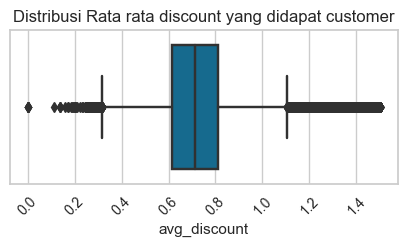

In [162]:
# create plot
plt.figure(figsize=(5,2))
sns.boxplot(x = df['avg_discount'])
plt.title("Distribusi Rata rata discount yang didapat customer")
plt.xticks(rotation=45)

# show plot
plt.show()

Terdapat customer dengan rata-rata discount lebih dari 1 atau 100%, hal ini tidak mungkin karena diskon yang diberikan berbentuk persentase, dan tidak mungkin lebih dari 100%. Data ini harus dihilangkan.

In [163]:
df = df[df['avg_discount'] < 1]

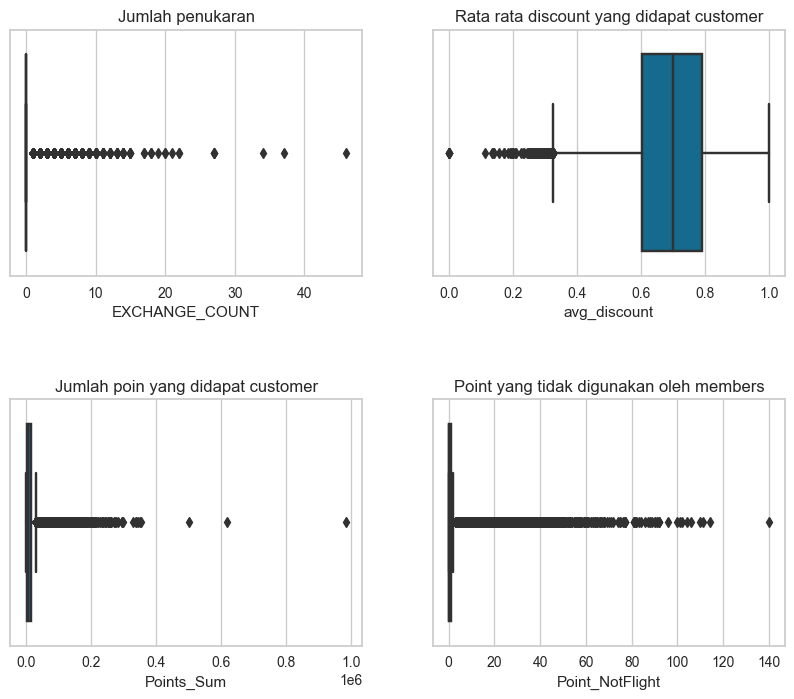

In [164]:
box_nums_plot3, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

sns.boxplot(x = df['EXCHANGE_COUNT'], ax = axs[0][0])
axs[0][0].set_title('Jumlah penukaran')

sns.boxplot(df, x='avg_discount', ax = axs[0][1])
axs[0][1].set_title('Rata rata discount yang didapat customer')

sns.boxplot(df, x='Points_Sum', ax = axs[1][0])
axs[1][0].set_title('Jumlah poin yang didapat customer')

sns.boxplot(df, x='Point_NotFlight', ax = axs[1][1])
axs[1][1].set_title('Point yang tidak digunakan oleh members')

box_nums_plot3.subplots_adjust(wspace=0.2, hspace = 0.5)

Diketahui mayoritas customer baru melakukan penukaran kurang dari 10 kali dengan rata-rata discount yang diperoleh kisaran antara 0.3 hingga 0.9.
Mayoritas customer menukarkan poin dengan total kurang dari 350000, dan total point yang tidak digunakan kurang dari 70.

Akan dilihat bagaimana hubungan banyak penukaran dengan banyak penerbangan customer untuk melihat apakah customer menggunakan kesempatan diskon atau poin ini dengan baik.

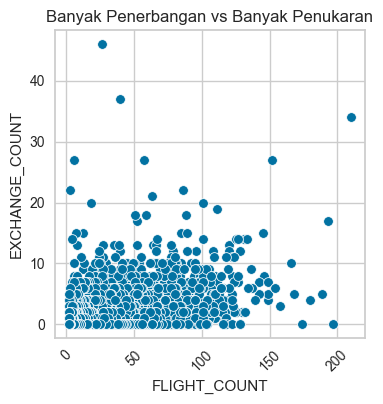

In [165]:
# create plot
plt.figure(figsize=(4,4))
sns.scatterplot(df, x = 'FLIGHT_COUNT', y = 'EXCHANGE_COUNT')
plt.title("Banyak Penerbangan vs Banyak Penukaran")
plt.xticks(rotation=45)

# show plot
plt.show()

Diketahui banyak customer yang banyak melakukan penerbangan yag tinggi tetapi tidak menggunakan kesempatan penukaran poin atau diskon yang dipunyai. Hal ini perlu ditinjau kembali apakah memang sistem discount dan poin ini kurang menarik di mata customer atau ada penyebab lain seperti penukaran poin yang rumit sehingga customer malas untuk menggunakan, dan sebagainya.

**Bagaimana distribusi durasi jarak antara tanggal pendaftaran FFP dengan penerbangan terakhir?**

Akan dianalisis jarak tanggal pendaftaran FFP dengan penerbangan terakhir untuk mengukur loyalitas pelanggan.

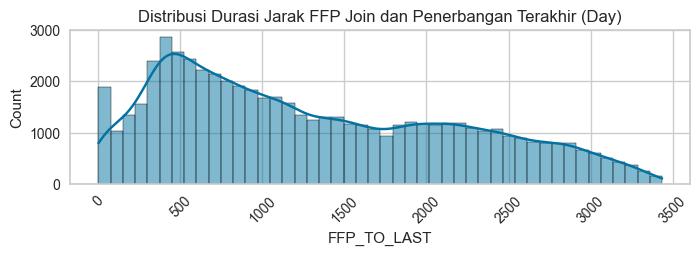

In [166]:
# Menghitung durasi flight rencency
df['FFP_TO_LAST'] = (df['LAST_FLIGHT_DATE'] - df['FFP_DATE']).dt.days
# create plot
plt.figure(figsize=(8,2))
sns.histplot(x = df['FFP_TO_LAST'], kde = True)
plt.title("Distribusi Durasi Jarak FFP Join dan Penerbangan Terakhir (Day)")
plt.xticks(rotation=45)

# show plot
plt.show()

Terlihat bahwa ternyata mayoritas customer memiliki jarak pendaftaran FFP program dengan penerbangan terakhir sekitar 400-700 hari, atau sekitar 1-2 tahun. Hal ini sejalan dengan pendaftaran customer yang paling tinggi di tahun 2011-2012.

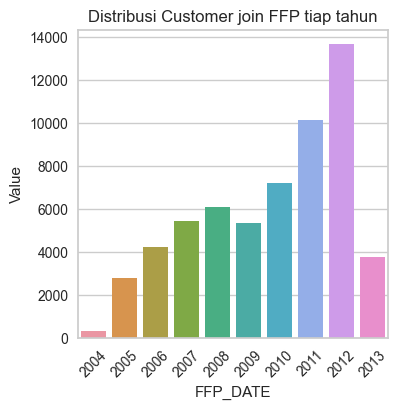

In [167]:
# create plot
plt.figure(figsize=(4,4))
sns.barplot(df.groupby(df['FFP_DATE'].dt.year).agg(Value = ('MEMBER_NO', 'nunique')).reset_index(),  y = 'Value', x = 'FFP_DATE')
plt.title("Distribusi Customer join FFP tiap tahun")
plt.xticks(rotation=45)

# show plot
plt.show()

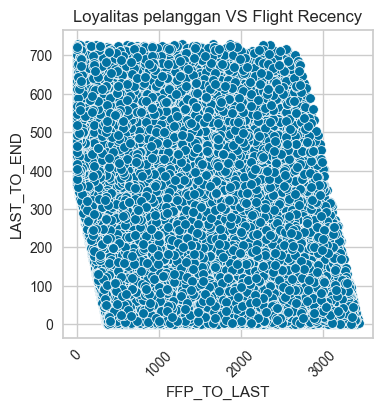

In [168]:
# create plot
plt.figure(figsize=(4,4))
sns.scatterplot(df, x = 'FFP_TO_LAST', y = 'LAST_TO_END')
plt.title("Loyalitas pelanggan VS Flight Recency")
plt.xticks(rotation=45)

# show plot
plt.show()

Dilihat dari durasi flight recency dan loyalitas pelanggan tidak berkorelasi positif dan cenderung berdistribusi menyebar tanpa membentuk trend apapun. Hal ini mengindikasikan bahwa customer cenderung beragam.

### DATA PROCESSING

**Feature Selection**

Pada clustering ini akan dipilih feature yang dianggap dapat merepresentasikan customer dengan baik. Dimana feature yang dipilih antara lain :
* LAST_TO_END : Feature digunakan untuk melihat flight recency yang dapat menggambarkan aktivitas customer karena dapat 
                menggambarkan aktivitas terakhir customer
* FLIGHT_COUNT : Feature ini digunakan untuk melihat frekuensi penerbangan customer
* AVG_INTERVAL : Feature ini digunakan untuk melihat bagaimana gambaran tipe perjalanan customer, apakah customer lebih 
                sering melakukan penerbangan dengan jarak jauh atau jarak dekat
* FFP_TO_LAST : Feature ini menggambaran loyalitas customer 
* avg_discount : Feature ini digunakan untuk melihat kecenderungan customer dalam sensitivitas terhadap harga

In [169]:
df_clean = df[['MEMBER_NO', 'LAST_TO_END', 'FLIGHT_COUNT', 'AVG_INTERVAL', 'FFP_TO_LAST', 'avg_discount']]

<Axes: >

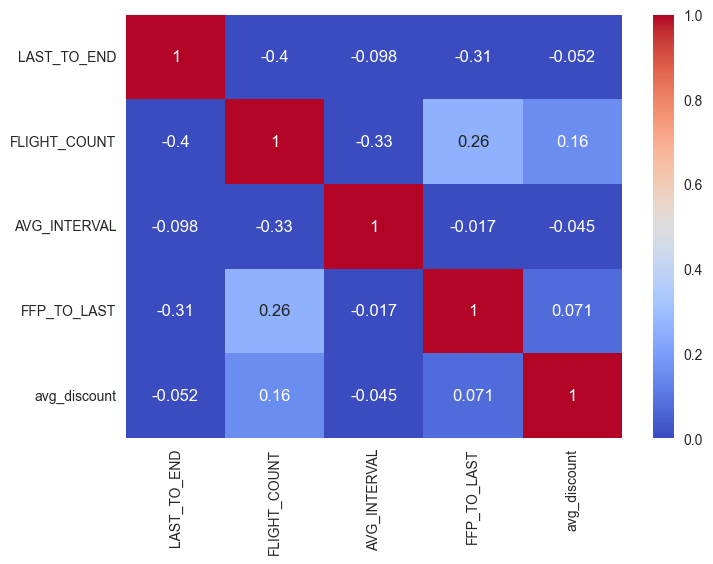

In [170]:
# Calculate the correlation matrix
corr_matrix = df_clean.drop('MEMBER_NO', axis = 1).corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot = True, vmin=0, vmax=1)

Dari correalation plot, dikatahui bahwa antara feature yang dipilih tidak ada yang berkorelasi tinggi, yang artinya feature yang dipilih sudah bagus karena tidak ada redundan atau informasi berulang.

**Outlier Handling**

Karena akan digunakan kmeans untuk melakukan clustering, dimana metode ini berbasis menghitung jarak, jadi akan dipisahkan terlebih dahulu data yang dianggap outlier dari data keseluruhan agar tidak menurunkan performa, sehingga cluster yang terbentuk lebih baik. Selanjutnya data yang dianggep outlier tadi akan ditentukan clusternya dengan metode klasifikasi KNN yang memiliki basis yang sama yaitu menghitung jarak.<br>
Dari Data analysis yang dilakukan, diketahui:
* Customer dengan banyak penerbangan lebih dari 200 dianggap outlier
* Customer dengan Rata-rata Discount kurang dari 0.1 dianggap outlier

In [171]:
# Memisah data yang dianggap outlier dan yang tidak dianggap outlier

model = df_clean[(df_clean['FLIGHT_COUNT'] < 200) &
        (df_clean['avg_discount'] > 0.1)]
print('Banyak data yang digunakan : ', model.shape[0])
outlier = df_clean[df_clean['MEMBER_NO'].isin(model['MEMBER_NO']) == False]
print('Banyak data outlier : ', outlier.shape[0])

Banyak data yang digunakan :  58878
Banyak data outlier :  8


**Feature Transformation**

Dilakukan normalisasi pada feature 'LAST_TO_END', 'FLIGHT_COUNT', 'AVG_INTERVAL', 'FFP_TO_LAST'. Karena akan digunakan metode kmeans, dimana metode ini berbasis pengukuran jarak, jadi data perlu untuk disamakan skalanya agar tidak terjadi bias dalam perhitungan. Feature avg_discount tidak dinormalisasi karena memang sudah berdistribusi normal dengan skala yang sama karena memang berbentuk persentase.

In [172]:
# minmax karena td normal
model_scaled = model.drop('MEMBER_NO', axis = 1)
minmaxscaler = MinMaxScaler()
model_scaled[['LAST_TO_END', 'FLIGHT_COUNT', 'AVG_INTERVAL', 'FFP_TO_LAST']] = minmaxscaler.fit_transform(model_scaled[['LAST_TO_END', 'FLIGHT_COUNT', 'AVG_INTERVAL', 'FFP_TO_LAST']])

In [173]:
model_scaled

,LAST_TO_END,FLIGHT_COUNT,AVG_INTERVAL,FFP_TO_LAST,avg_discount
4,0.005487,0.769231,0.006122,0.527220,0.970658
5,0.106996,0.461538,0.009222,0.629694,0.967692
6,0.000000,0.507692,0.009423,0.852984,0.965347
7,0.002743,0.364103,0.013437,0.421834,0.962070
8,0.006859,0.276923,0.017482,0.297525,0.828478
...,...,...,...,...,...
62974,0.120713,0.000000,0.095740,0.920233,0.710000
62975,0.164609,0.000000,0.002290,0.535953,0.670000
62976,0.052126,0.000000,0.576729,0.385444,0.225000
62977,0.635117,0.000000,0.005039,0.000873,0.250000


### DATA MODELING

Untuk melihat berapa banyak cluster atau kelompok yang baik untuk melakukan segmentasi data, akan dilakukan elbow test dan silhouette test terlebih dahulu untuk menentukan berapa segmen customer yang ideal.

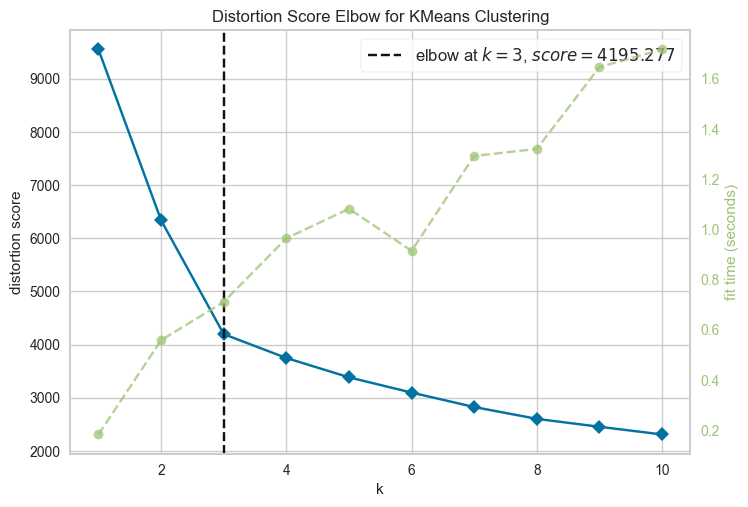

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [174]:
#WSS elbow test

# Instantiate the clustering model and visualizer
WSS =  KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
visualizer = KElbowVisualizer(WSS, k=(1,11))

visualizer.fit(model_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

c:\Users\una\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\una\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\una\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\una\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_in

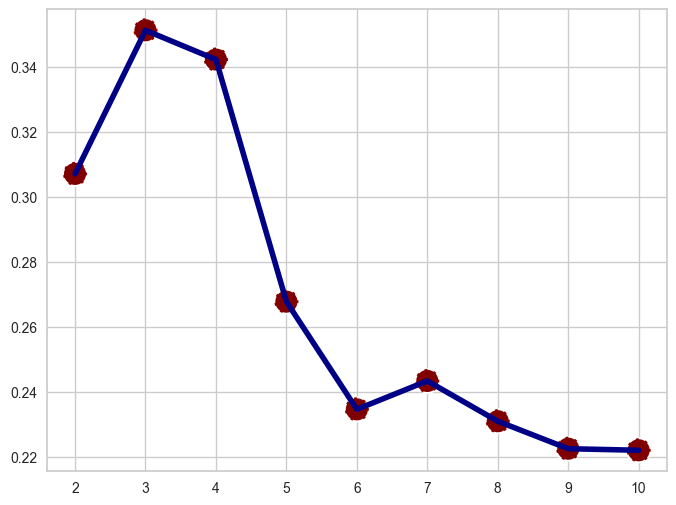

In [175]:
range_n_clusters = list(range(2,11))
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(model_scaled)
    preds = kmeans.predict(model_scaled)
     
    score_euclidean = silhouette_score(model_scaled, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')
plt.show()

Diketahui dari elbow test dan silhouette test diperoleh angka 3 yang merupakan banyak cluster paling ideal untuk melakukan segmentasi data pada dataset ini. Untuk hasil silhouette score, diketahui bahwa dengan 3 cluster diperoleh skor sebesar 0.35, dimana skor tersebut dianggap dapat mengelompokkan data dengan cukup baik.

In [176]:
# Clustering model
kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10, random_state = 0)
kmeans.fit(model_scaled)
model['CLUSTER'] = kmeans.labels_
model_scaled['CLUSTER'] = kmeans.labels_

C:\Users\una\AppData\Local\Temp\ipykernel_10348\1518690834.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model['CLUSTER'] = kmeans.labels_


Setelah melakukan clustering model, akan dilihat bagaimana sebaran data yang telah dikelompokkan untuk melihat apakah data sudah terpisah dengan baik. Untuk melakukan visualisasi data ini, digunakan pca untuk mereduksi feature agar lebih mudah divisualisasikan.

<Axes: xlabel='pc1', ylabel='pc2'>

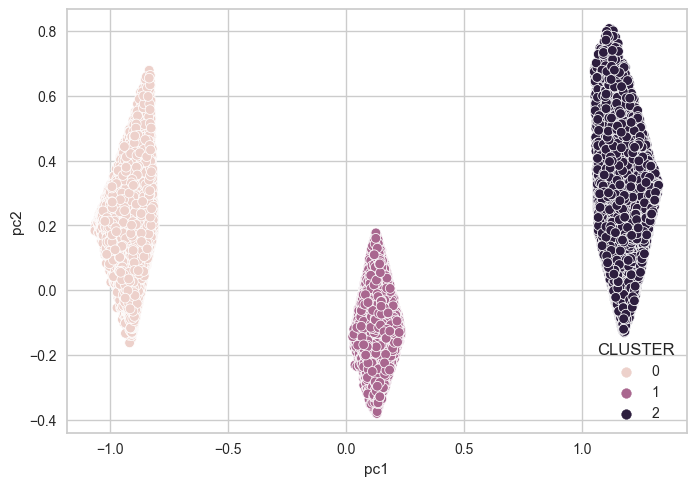

In [177]:
pcs = PCA(n_components = 2).fit_transform(model_scaled)
pdf = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2'])
pdf['CLUSTER'] = kmeans.labels_
sns.scatterplot(pdf, x = 'pc1', y = 'pc2', hue = 'CLUSTER')

Dari visualisasi yang diperoleh, terlihat data sudah terpisah dengan baik berdasarkan clusternya.

Kemudian akan dilakukan penentuan cluster untuk data yang dianggap outlier pada awal dengan metode klasifikasi dengan KNN. Algoritma ini digunakan karena sama-sama memiliki basis perhitungan jarak, sehingga dianggap cocok untuk menentukan cluster.

In [178]:
# Feature engineering untuk data outlier
outlier_scaled = outlier.drop('MEMBER_NO', axis = 1)
outlier_scaled[['LAST_TO_END', 'FLIGHT_COUNT', 'AVG_INTERVAL', 'FFP_TO_LAST']] = minmaxscaler.fit_transform(outlier_scaled[['LAST_TO_END', 'FLIGHT_COUNT', 'AVG_INTERVAL', 'FFP_TO_LAST']])

Akan dicari terlebih daulu berapa n_neighbors yang baik digunakan untuk melakukan klasifikasi dengan algortma KNN. Akan digunakan cross validation dengan data train dari data yang digunakan untuk clustering untuk menentukannya.

In [179]:
# Initialize KNN classifier
for i in range(2,20):
    knn = KNeighborsClassifier(n_neighbors=i)

    # Perform cross-validation with 10 folds
    scores = cross_val_score(knn, model_scaled.drop('CLUSTER', axis = 1), model_scaled['CLUSTER'], cv=5)

    # Print the accuracy for each fold
    print('n_neoighbors : ', i)

    # Calculate the mean accuracy and standard deviation
    print("Average accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

n_neoighbors :  2
Average accuracy: 0.97 (+/- 0.02)
n_neoighbors :  3
Average accuracy: 0.98 (+/- 0.02)
n_neoighbors :  4
Average accuracy: 0.98 (+/- 0.02)
n_neoighbors :  5
Average accuracy: 0.98 (+/- 0.02)
n_neoighbors :  6
Average accuracy: 0.98 (+/- 0.02)
n_neoighbors :  7
Average accuracy: 0.98 (+/- 0.02)
n_neoighbors :  8
Average accuracy: 0.98 (+/- 0.02)
n_neoighbors :  9
Average accuracy: 0.98 (+/- 0.02)
n_neoighbors :  10
Average accuracy: 0.98 (+/- 0.02)
n_neoighbors :  11
Average accuracy: 0.98 (+/- 0.02)
n_neoighbors :  12
Average accuracy: 0.98 (+/- 0.02)
n_neoighbors :  13
Average accuracy: 0.98 (+/- 0.02)
n_neoighbors :  14
Average accuracy: 0.98 (+/- 0.02)
n_neoighbors :  15
Average accuracy: 0.98 (+/- 0.02)
n_neoighbors :  16
Average accuracy: 0.98 (+/- 0.02)
n_neoighbors :  17
Average accuracy: 0.98 (+/- 0.02)
n_neoighbors :  18
Average accuracy: 0.98 (+/- 0.02)
n_neoighbors :  19
Average accuracy: 0.98 (+/- 0.02)


Diketahui bahwa n_neighbors = 4 sudah baik untuk digunakan dalam klasifikasi data ini.

In [184]:
# Penentuan cluster untuk data outlier
# create KNN model with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# fit the model using the training data
knn.fit(model_scaled.drop('CLUSTER', axis = 1), model_scaled['CLUSTER'])

# predict on the test data
outlier['CLUSTER'] = knn.predict(outlier_scaled)

C:\Users\una\AppData\Local\Temp\ipykernel_10348\996065996.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier['CLUSTER'] = knn.predict(outlier_scaled)


In [185]:
outlier

,MEMBER_NO,LAST_TO_END,FLIGHT_COUNT,AVG_INTERVAL,FFP_TO_LAST,avg_discount,CLUSTER
0,54993,1,210,3.483254,2706,0.961639,0
62980,1761,558,2,12.000000,45,0.000000,2
62981,15206,178,2,3.000000,674,0.000000,2
62983,18375,297,2,4.000000,751,0.000000,2
62984,36041,89,4,37.000000,1397,0.000000,0
62985,45690,29,2,166.000000,2895,0.000000,0
62986,61027,400,2,12.000000,20,0.000000,2
62987,61340,403,2,6.000000,6,0.000000,2


Kemudian akan digabungkan kembali data outlier ke dalam dataset.

In [186]:
final_cluster = pd.concat([model, outlier]).reset_index().drop('index', axis = 1)
final_cluster

,MEMBER_NO,LAST_TO_END,FLIGHT_COUNT,AVG_INTERVAL,FFP_TO_LAST,avg_discount,CLUSTER
0,39546,5,152,4.788079,1812,0.970658,0
1,56972,79,92,7.043956,2164,0.967692,0
2,44924,1,101,7.190000,2931,0.965347,0
3,22631,3,73,10.111111,1450,0.962070,1
4,32197,6,56,13.054545,1023,0.828478,1
...,...,...,...,...,...,...,...
58881,18375,297,2,4.000000,751,0.000000,2
58882,36041,89,4,37.000000,1397,0.000000,0
58883,45690,29,2,166.000000,2895,0.000000,0
58884,61027,400,2,12.000000,20,0.000000,2


### CONCLUSION

In [187]:
# Overview hasil clustering
display(final_cluster.groupby('CLUSTER').agg({'LAST_TO_END':'median', 'FLIGHT_COUNT':'median', 'AVG_INTERVAL':'median', 'FFP_TO_LAST': 'mean','avg_discount': 'mean'}).round(2))

,LAST_TO_END,FLIGHT_COUNT,AVG_INTERVAL,FFP_TO_LAST,avg_discount
CLUSTER,,,,,
0,60.0,10.0,43.67,2374.33,0.71
1,73.0,8.0,52.50,830.32,0.69
2,457.0,3.0,31.50,712.04,0.67


Diketahui dari hasil cluster :
* CLUSTER 0 (Kelompok customer lama yang loyal) :
    * Customer merupakan customer lama
    * Customer masih menggunakan layanan maskapai, dilihat dari flight recency yang relatif baru
    * Customer memiliki frekuensi penerbangan tinggi
    * Customer cenderung sering melakukan perjalanan yang singkat
    * Customer menggunakan diskon yang tinggi
    * Dapat disimpulkan cluster ini merupakan kelompok customer loyal, jika dilihat dari angka rata-rata diskon yang diperoleh, pemberian diskon mungkin menjadi alasan customer bertahan menggunakan layanan maskapai ini, terlebih customer sering melakukan perjalanan dengan jarak dekat.
* CLUSTER 1 (Kelompok customer realtif baru) : 
    * Customer merupakan customer relatif baru jika dilihat dari durasi member dan flight recencynya
    * Customer masih menggunakan layanan maskapai, dilihat dari flight recency yang relatif baru
    * Customer memiliki frekuensi penerbangan rendah, hal ini mungkin karena memang customer baru bergabung member FFP dalam waktu dekat
    * Customer cenderung sering melakukan perjalanan dengan interval sedang
    * Customer menggunakan diskon yang rata-rata sedang
    * Dapat disimpulkan cluster ini merupakan kelompok yang relatif baru bergabung dengan maskapai.
* CLUSTER 2 (Kelompok customer lama yang relatif tidak aktif lagi) : 
    * Customer merupakan customer lama yang tidak lagi menggunakan layanan maskapai jika dilihat dari durasi member dan flight recencynya
    * Customer memiliki frekuensi penerbanganyang sangat rendah, hal ini mungkin karena memang customer hanya beberapa kali menggunakan layanan maskapai sebelum memutuskan untuk tidak menggunakannya lagi
    * Customer cenderung sering melakukan perjalanan dengan interval rendah atau jarak dekat
    * Customer menggunakan diskon yang rata-rata rendah
    * Dapat disimpulkan cluster ini merupakan kelompok yang kemungkinan hanya mencoba layanan maskapai beberapa kali dan berhenti menggunakan layanan. 

#### **Business Recommendation**

* Untuk customer pada cluster 0 (Customer loyal), perusahaan perlu untuk memberikan strategi yang bertujuan untuk menjaga loyalitas customer, seperti memberikan hadiah, diskon pelanggan, atau promo yang lebih menarik
* Untuk customer pada cluster 1 (Customer baru), perusahaan perlu untuk memberikan strategi yang bertujuan untuk menarik customer tersebut untuk terus menggunakan layanan maskapai pada masa depan, seperti promo buy 3 get 1 free ticket, atau kode referral untuk menarik customer agar terus menggunakan layanan dari perusahaan.
* Untuk customer pada cluster 2 (Customer lama yang berhenti berlangganan), perusahaan perlu berfokun untuk memberikan strategi agar customer  tertarik kembali untuk menggunakan layanan maskapai, seperti memberikan promo atau diskon khusus customer lama, atau memberikan diskon untuk penerbangan jarak dekat karena customer pada cluster ini cenderung melakukan penerbangan jarak dekat.